In [1]:
import numpy as np
import pandas as pd
import json
import ast
from tqdm import tqdm
import pandas as pd
import numpy as np
import nltk
nltk.download('reuters')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.corpus import reuters
from emot.emo_unicode import UNICODE_EMOJI # For emojis
from emot.emo_unicode import EMOTICONS_EMO # For EMOTICONS
import matplotlib.pyplot as plt
import seaborn as sns
import emoji
import sklearn
import re
from wordcloud import WordCloud
from matplotlib import pyplot as plt


[nltk_data] Downloading package reuters to C:\Users\Samyak
[nltk_data]     Jain\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!


In [124]:
# Solana  ,   Avalanche  ,  DogeCoin  ,  Matic  , ShibaInu

In [125]:
crypto = "Avalanche"

In [126]:
df = pd.read_csv(f'./preprocessed_data/{crypto}_combined_preproc.csv')

In [127]:
print(df.shape)

(44327, 24)


In [128]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'text', 'favourite_count',
       'retweet_count', 'created_at', 'User', 'place', 'time', 'high', 'low',
       'open', 'volume_from', 'volume_to', 'close', 'user_id_str', 'user_name',
       'user_followers_count', 'user_verified', 'hashtags', 'mentioned',
       'clean_tweet', 'changed_text'],
      dtype='object')

In [129]:
string = []
for t in df['changed_text']:
    string.append(t)
token_set = set()
for sent in string:
    # print(sent)
    sent = str(sent)
    # print(type(sent))
    toks = list(sent.split(' '))
    for tok in toks:
        token_set.add(tok)
token_set = list(token_set)
string = list(set(string))
string = pd.Series(token_set).str.cat(sep=' ')

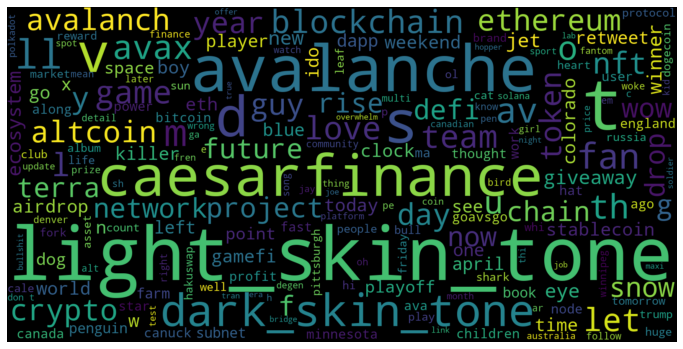

In [130]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig(f'./eda_results/wordcloud_{crypto}')
plt.show()

In [131]:
print(df.shape)
df.shape[0]

(44327, 24)


44327

Tweet Counts

In [132]:
coins = ['avax', 'doge', 'matic','shiba', 'solana']

In [2]:
df_avax = pd.read_csv("./preprocessed_data/Avalanche_combined_preproc.csv")
df_doge = pd.read_csv("./preprocessed_data/DogeCoin_combined_preproc.csv")
df_matic = pd.read_csv("./preprocessed_data/Matic_combined_preproc.csv")
# df_ripple = pd.read_csv("./preprocessed_data/Ripple_combined_preproc.csv")
df_shib = pd.read_csv("./preprocessed_data/ShibaInu_combined_preproc.csv")
df_sol = pd.read_csv("./preprocessed_data/Solana_combined_preproc.csv")

In [3]:
counts = {'avax': df_avax.shape[0], 'doge': df_doge.shape[0], 'matic': df_matic.shape[0], 'shiba': df_shib.shape[0], 'solana': df_sol.shape[0]}

In [4]:
counts_df = pd.DataFrame(counts.items(), columns=['crypto coin','#tweets'])
counts_df[counts_df.columns[::-1]]

,#tweets,crypto coin
0,44327,avax
1,54307,doge
2,263109,matic
3,42857,shiba
4,182639,solana


In [5]:
counts_df

,crypto coin,#tweets
0,avax,44327
1,doge,54307
2,matic,263109
3,shiba,42857
4,solana,182639


In [6]:
counts_df.loc[counts_df["crypto coin"] == "avax", "#tweets"] = 22229

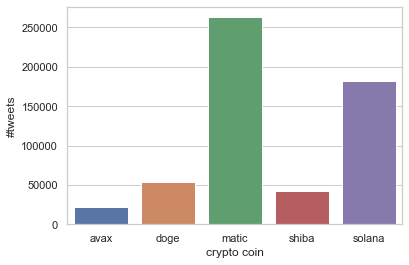

In [7]:
sns.set_theme(style="whitegrid")
# tips = sns.load_dataset("tips")
ax = sns.barplot(x="crypto coin", y="#tweets", data=counts_df)
plt.savefig("./eda_results/tweet_counts.png", bbox_inches='tight', facecolor='w')

In [18]:
df_avax['lens'] = df_avax['text'].apply(lambda x: len(str(x)))
df_doge['lens'] = df_doge['text'].apply(lambda x: len(str(x)))
df_matic['lens'] = df_matic['text'].apply(lambda x: len(str(x)))
df_shib['lens'] = df_shib['text'].apply(lambda x: len(str(x)))
df_sol['lens'] = df_sol['text'].apply(lambda x: len(str(x)))

In [19]:
lens = {'avax': df_avax['lens'].sum() / df_avax.shape[0], 'doge': df_doge['lens'].sum() / df_doge.shape[0], 'matic': df_matic['lens'].sum() / df_matic.shape[0], 'shiba': df_shib['lens'].sum() / df_shib.shape[0], 'solana': df_sol['lens'].sum() / df_sol.shape[0]}

In [23]:
lens_df = pd.DataFrame(lens.items(), columns=['crypto coin','Avg. Tweet Length'])
lens_df[lens_df.columns[::-1]]
lens_df = lens_df.astype({'Avg. Tweet Length':'int'})

In [25]:
lens_df

,crypto coin,Avg. Tweet Length
0,avax,186
1,doge,194
2,matic,208
3,shiba,179
4,solana,198


In [28]:
overall_avg = sum(lens.values()) / 5
overall_avg

193.45768631100617

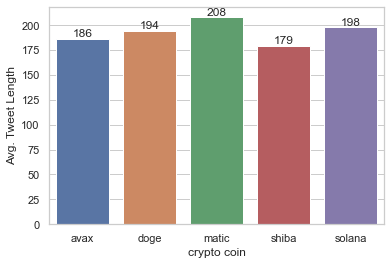

In [29]:
sns.set_theme(style="whitegrid")
# tips = sns.load_dataset("tips")
ax = sns.barplot(x="crypto coin", y="Avg. Tweet Length", data=lens_df)
ax.bar_label(ax.containers[0])
plt.savefig("./eda_results/tweet_lens.png", bbox_inches='tight', facecolor='w')